In [2]:
import pandas as pd
from numpy import linalg as la
import matplotlib.pyplot as plt
import numpy as np

In [3]:
K = pd.read_csv(r'C:\\Users\\Ольга\\Downloads\\2025\\2025\\k.csv', sep=' ', header=None, skiprows=1)
K


,0,1,2,3,4,5,6,7,8,9,...,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030
0,SPCH,131,0,0,1234,spectre_type{5},2.025710,0.974290,2.945799,6.423595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,#0.93,-1,-1,timeparams{},"nr_rz_integral{1.000000,1.000000}",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SPCH,131,0,0,1234,spectre_type{5},0.675237,0.324763,2.945799,6.423595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,#0.58,-1,-1,timeparams{},"nr_rz_integral{1.000000,1.000000}",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SPCH,131,0,0,1234,spectre_type{5},2.700946,3.416583,2.355370,7.430607,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,#0.98,-1,-1,timeparams{},"nr_rz_integral{1.000000,1.000000}",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,SPCH,131,0,0,1234,spectre_type{5},1.350473,3.472899,8.541124,6.470785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
7,#0.63,-1,-1,timeparams{},"nr_rz_integral{1.000000,1.000000}",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,SPCH,131,0,0,1234,spectre_type{5},4.051419,2.654424,1.767056,3.595326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9,#0.68,-1,-1,timeparams{},"nr_rz_integral{1.000000,1.000000}",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Удаление каждой второй строки
K = K[::2].reset_index(drop=True)

# Удаление столбцов до 6-го (то есть 0-5)
K = K.iloc[:, 6:]
K = K.drop(columns=K.columns[1024], axis=1)
K_sums = K.sum()
K_sums



6       18.231386
7       29.943907
8       36.554814
9       52.457986
10      48.847969
          ...    
1025     0.000000
1026     0.000000
1027     0.000000
1028     0.000000
1029     0.000000
Length: 1024, dtype: float64

In [5]:
U = pd.read_csv(r'C:\Users\Ольга\Downloads\2025\2025\u.mdb.csv', sep=' ', header=None, skiprows=1)

# Удаление каждой второй строки
U = U[::2].reset_index(drop=True)

# Удаление столбцов до 6-го (то есть 0-5)
U = U.iloc[:, 6:]
U = U.drop(columns=U.columns[1024], axis=1)
U_sums = U.sum()
U_sums

6        71.899833
7       143.505843
8       202.458097
9       238.581859
10      262.351363
           ...    
1025      0.000000
1026      0.000000
1027      0.000000
1028      0.000000
1029      0.000000
Length: 1024, dtype: float64

In [6]:
Th = pd.read_csv(r'C:\Users\Ольга\Downloads\2025\2025\th.mdb.csv', sep=' ', header=None, skiprows=1)

# Удаление каждой второй строки
Th = Th[::2].reset_index(drop=True)

# Удаление столбцов до 6-го (то есть 0-5)
Th = Th.iloc[:, 6:]
Th = Th.drop(columns=Th.columns[1024], axis=1)
Th_sums = Th.sum()
Th_sums

6        98.258097
7       190.827713
8       226.623929
9       258.190762
10      334.384975
           ...    
1025      0.000000
1026      0.000000
1027      0.000000
1028      0.000000
1029      0.000000
Length: 1024, dtype: float64

In [7]:
K_sums = np.array(K_sums)
U_sums = np.array(U_sums)
Th_sums = np.array(Th_sums)


In [8]:
K_U_Th_matrix = np.vstack((K_sums, U_sums, Th_sums))


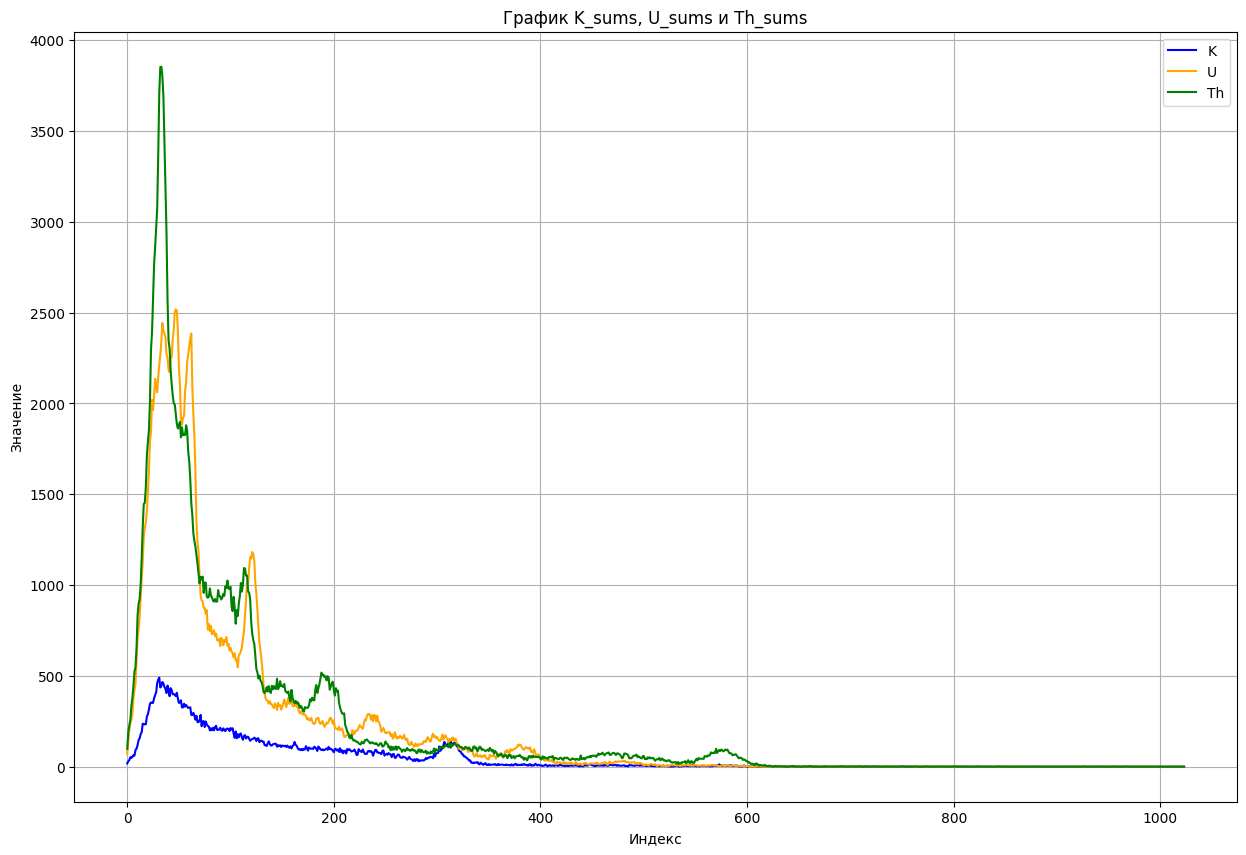

In [9]:
plt.figure(figsize=(15, 10))
plt.plot(K_sums, label='K', color='blue')
plt.plot(U_sums, label='U', color='orange')
plt.plot(Th_sums, label='Th', color='green')
plt.title('График K_sums, U_sums и Th_sums')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.show()


In [10]:
Quest = pd.read_csv(r'C:\Users\Ольга\Downloads\2025\2025\quest.mdb.csv', sep=' ', header=None, skiprows=1)

# Удаление каждой второй строки
Quest= Quest[::2].reset_index(drop=True)

# Удаление столбцов до 6-го (то есть 0-5)
Quest = Quest.iloc[:, 6:]
Quest = Quest.drop(columns=Quest.columns[1024], axis=1)
Quest

,6,7,8,9,10,11,12,13,14,15,...,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029
0,0.675237,4.559822,4.710740,7.190651,7.447190,6.385977,4.465888,2.343461,9.355593,7.750696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.401892,8.950696,13.694157,17.760267,21.882805,21.703840,25.870896,47.791208,33.361491,42.500723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.675237,2.442293,3.828269,2.588314,3.656539,4.950696,5.153033,12.268893,8.731107,12.542460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.401892,12.732666,15.912187,22.362604,23.139232,25.986422,37.961157,38.414691,35.253088,56.964274,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.675237,3.148136,2.649527,0.527101,5.583639,7.214246,4.175070,2.806010,9.421925,12.834057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.726656,12.155147,22.529438,24.231052,24.642849,26.249861,37.961157,39.929215,52.087590,54.191653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2.700946,4.828269,1.470785,4.602337,4.588314,1.637618,5.324986,6.808681,11.092710,11.650417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,9.778075,11.280356,11.778965,19.270785,32.810017,32.101614,35.040846,42.033166,38.785142,39.970506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.376183,3.741347,6.774068,4.409572,7.080134,7.416583,10.649750,10.182749,11.291597,13.997329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,7.427602,8.513300,13.842293,19.557930,17.421480,19.802782,14.600000,24.071675,31.940456,39.838175,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


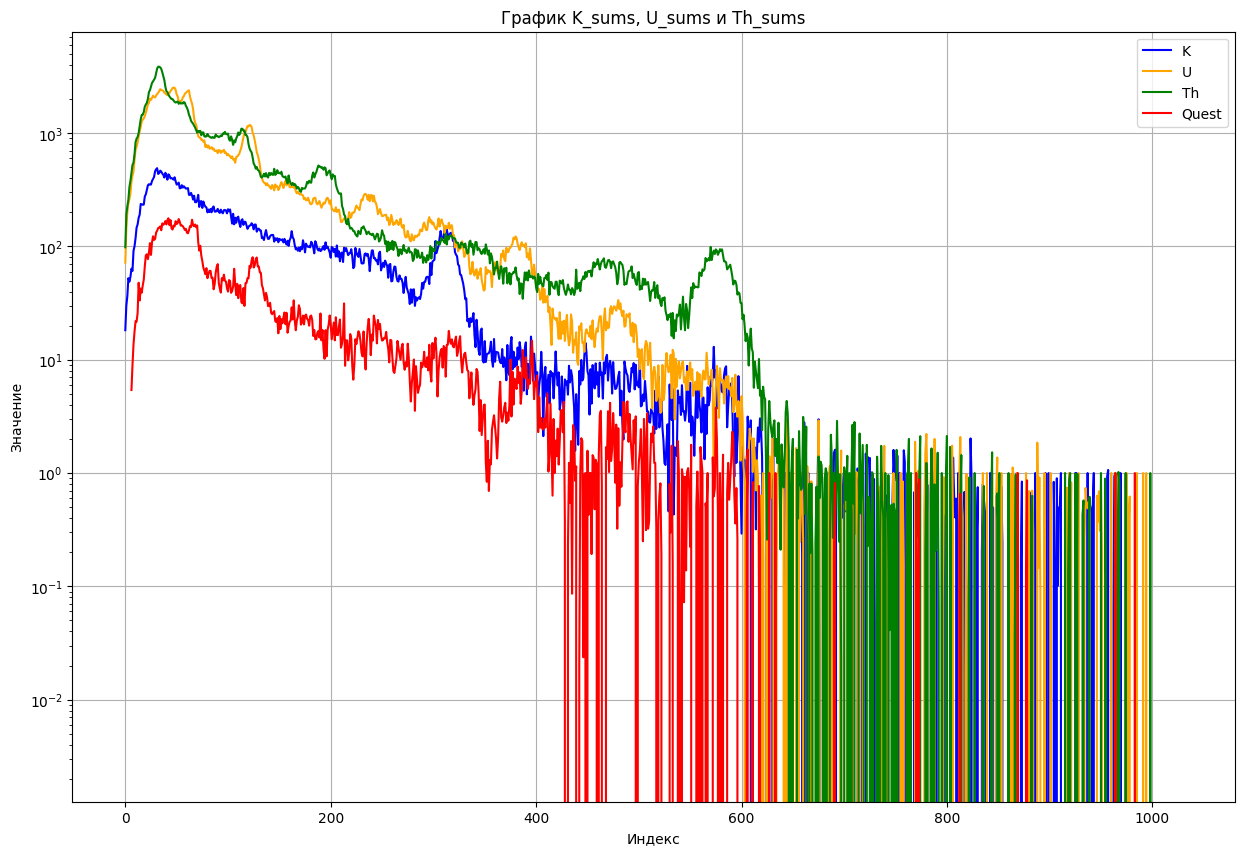

In [11]:
plt.figure(figsize=(15, 10))
plt.plot(K_sums, label='K', color='blue')
plt.plot(U_sums, label='U', color='orange')
plt.plot(Th_sums, label='Th', color='green')
plt.plot(Quest[1:2].T, label='Quest', color='red')
plt.title('График K_sums, U_sums и Th_sums')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

## $$C=(S^Т S)^-(1) * S^T Ω$$

In [12]:
S= (np.array(K_U_Th_matrix)).T
Omega = (np.array(Quest)).T
S, Omega

(array([[ 18.23138564,  71.89983306,  98.25809683],
        [ 29.94390651, 143.50584307, 190.82771285],
        [ 36.55481358, 202.45809683, 226.62392877],
        ...,
        [  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ]]),
 array([[ 0.67523651,  5.40189204,  0.67523651, ...,  2.02570952,
          0.67523651,  0.        ],
        [ 4.55982193,  8.9506956 ,  2.44229271, ...,  3.0918197 ,
          2.44229271,  0.70584307],
        [ 4.71074012, 13.69415693,  3.82826934, ...,  4.56471898,
          6.77406789,  4.71285476],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]))

In [13]:
Concentration = np.dot(np.linalg.inv(np.dot(S.T,S)),np.dot(S.T,Omega))

Concentration = Concentration.T
print(Concentration)

[[ 5.99783990e-02  2.27180694e-03  2.78864245e-03]
 [ 1.04220092e-02  6.31636764e-02  3.00516208e-03]
 [ 7.08920019e-02  1.14062906e-03  2.57504611e-03]
 [-3.24566052e-03  8.36436095e-02  1.36005443e-03]
 [ 7.19375040e-02  1.96334414e-03  1.44356833e-03]
 [-2.43963512e-03  8.52275951e-02  1.81967085e-03]
 [ 6.83454578e-02  2.75325640e-03  2.66273937e-03]
 [ 2.05536678e-02  8.01831136e-02 -1.51290258e-03]
 [ 6.14516871e-02  5.27188689e-03  2.63405820e-03]
 [ 2.95757749e-02  5.38212540e-02  2.88268271e-03]
 [ 6.60206364e-02  9.33533244e-03  1.08710072e-03]
 [ 8.17210676e-02  2.71396135e-02 -1.70041767e-03]
 [ 6.99785162e-02  1.72218567e-02  5.93734391e-07]
 [ 9.39518895e-02  8.20005135e-03  3.38176057e-03]
 [ 5.51115268e-02  3.60425004e-02 -3.04562908e-03]
 [ 9.36199950e-02  9.00584805e-03  4.11408406e-03]
 [ 9.16047138e-02  3.02992192e-03  1.91957878e-02]
 [ 4.91793539e-02  2.10552491e-03  4.81426907e-02]
 [ 1.37175282e-02  1.55467049e-02  6.23324810e-02]
 [ 1.10657409e-02  4.04200681e-

In [14]:
Conc = Concentration.T

## Определение границ выборки данных:
### При шаге 40 см и соотношении 5 единиц = 8 см, исключаем по 8 единиц с каждого конца (16 всего),получая диапазон от 8 до 44 (52 - 8 = 44)
## Размер итоговой выборки:
### После исключения 16 единиц (8 с каждой стороны), из исходных 52 получаем 36 значений

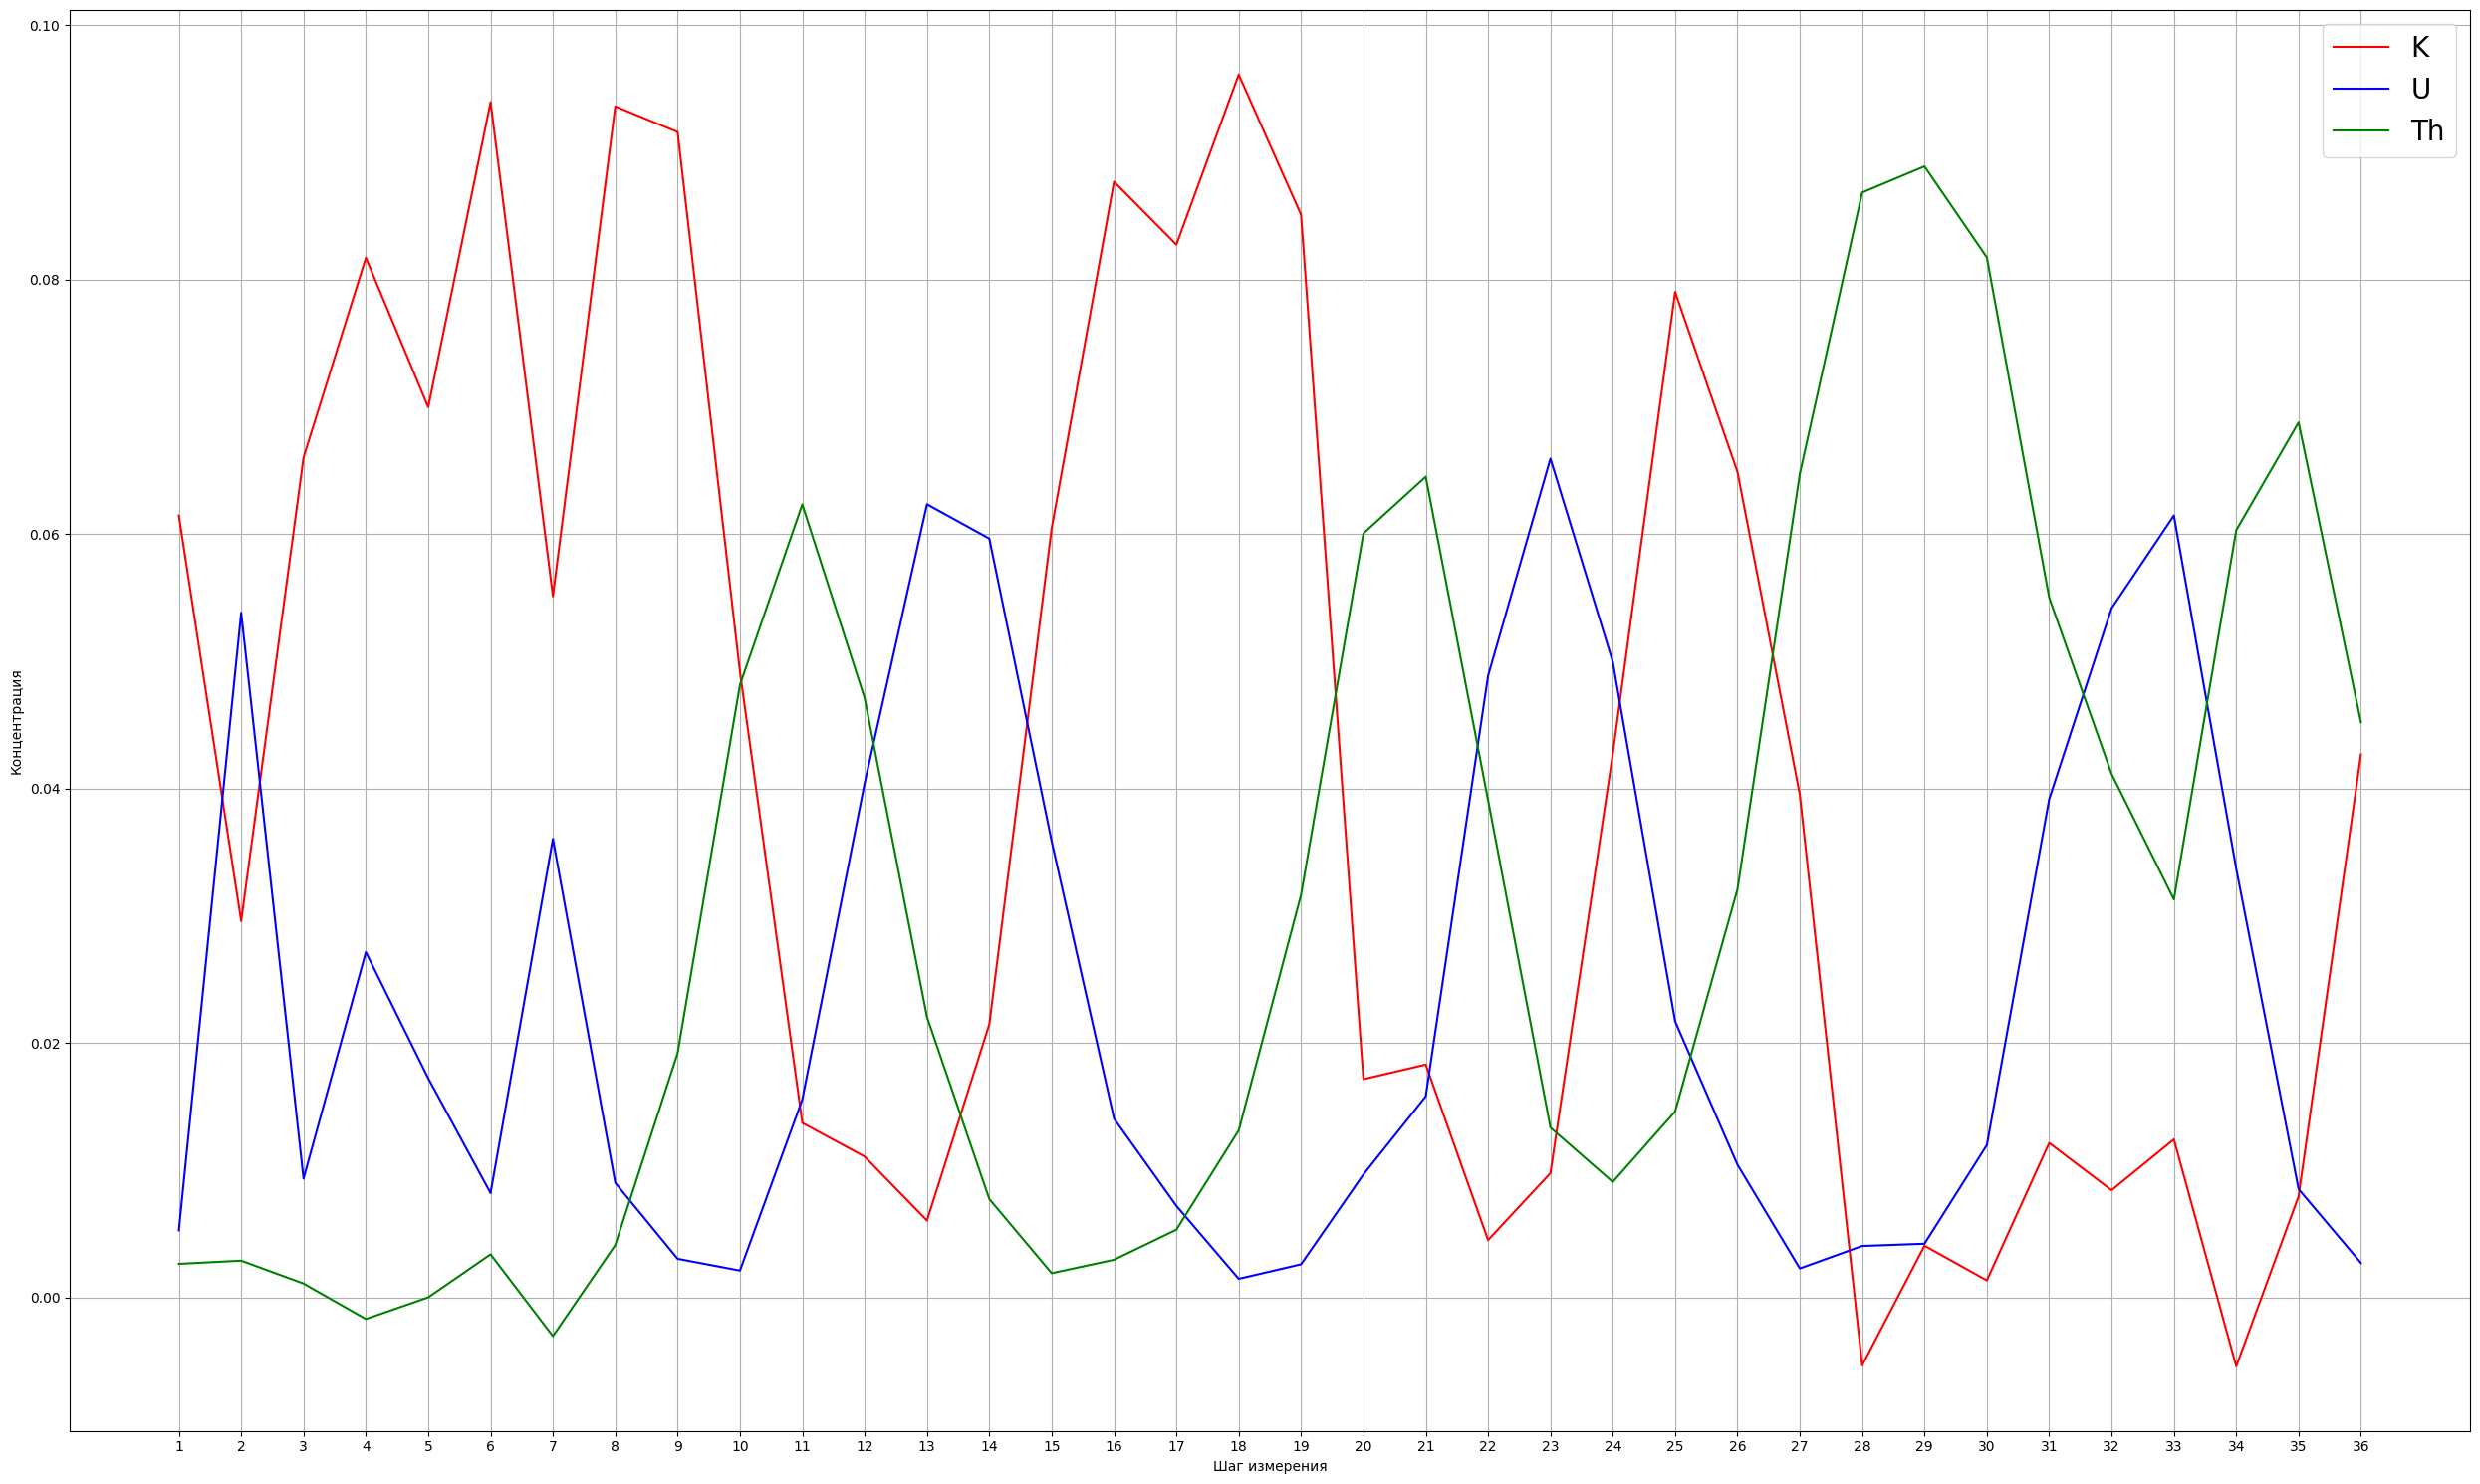

In [22]:
Conc_K = Conc[0, 8:44] 
Conc_U = Conc[1, 8:44] 
Conc_Th = Conc[2, 8:44] 

# Формирование последовательности измерений
measurement_points = np.arange(1, 37)


fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(measurement_points, Conc_K, 'r-', label='K')
ax.plot(measurement_points, Conc_U, 'b-', label='U') 
ax.plot(measurement_points, Conc_Th, 'g-', label='Th')
ax.set_xticks(np.arange(1, 37))
ax.set_xlabel('Шаг измерения')
ax.set_ylabel('Концентрация')
ax.legend(fontsize=20)
ax.grid(True)
plt.tight_layout()
plt.show()

In [20]:
sample_i = np.round(np.linspace(0, len(Conc_K) - 1, 15)).astype(int)

df = pd.DataFrame({'K': Conc_K[sample_i], 'U': Conc_U[sample_i], 'Th': Conc_Th[sample_i]})
sequence = df.idxmax(axis=1).tolist()

print("Последовательность укладки образцов:", sequence)



Последовательность укладки образцов: ['K', 'K', 'K', 'K', 'Th', 'U', 'K', 'K', 'Th', 'U', 'K', 'Th', 'Th', 'U', 'Th']


### Однако, если помсотреть на график, видно, что первое значение соответсвует U, а также на 7-ом шаге измерения тоже U. Неправильная интерпретация может быть связана с особеннностями измерения  и влияния соседних болванок